In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Set monthly household income
monthly_income = 12000

# Current amount of crypto assets
BTC = 1.2
ETH = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD" +"?format=json"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD" +"?format=json"

In [5]:
requests.get(btc_url)
requests.get(eth_url)

<Response [200]>

In [6]:
# Fetch current BTC price
# Fetch current ETH price

response_btc_data = requests.get(btc_url)
response_eth_data = requests.get(eth_url)

btc_content = response_btc_data.content
eth_content = response_eth_data.content


In [7]:
import json

btc_data = response_btc_data.json()
eth_data = response_eth_data.json()

print(json.dumps(btc_data, indent=5))
print(json.dumps(eth_data, indent=5))

{
     "data": {
          "1": {
               "id": 1,
               "name": "Bitcoin",
               "symbol": "BTC",
               "website_slug": "bitcoin",
               "rank": 1,
               "circulating_supply": 18517412,
               "total_supply": 18517412,
               "max_supply": 21000000,
               "quotes": {
                    "USD": {
                         "price": 11369.44,
                         "volume_24h": 20349949708,
                         "market_cap": 210595694332,
                         "percentage_change_1h": -0.204423049692494,
                         "percentage_change_24h": -0.601203606030911,
                         "percentage_change_7d": 6.57502650697134,
                         "percent_change_1h": -0.204423049692494,
                         "percent_change_24h": -0.601203606030911,
                         "percent_change_7d": 6.57502650697134
                    }
               },
               "last_updated": 160

In [8]:
btc_current_price = btc_data['data']['1']['quotes']['USD']['price']
eth_current_price = eth_data['data']['1027']['quotes']['USD']['price']

print(btc_current_price)
print(eth_current_price)

11369.44
376.35


In [9]:
# Compute current value of my crpto
BTC_value = round(BTC * btc_current_price, 2)
ETH_value = round(ETH * eth_current_price, 2)

print(f'The current value of {BTC} BTC is ${BTC_value}.')
print(f'The current value of {ETH} BTC is ${ETH_value}.')

The current value of 1.2 BTC is $13643.33.
The current value of 5.3 BTC is $1994.65.


In [10]:
# Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)
# Current amount of shares
AGG = 200
SPY = 50

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(type(alpaca_api_key))
print(type(alpaca_secret_key))

<class 'str'>
<class 'str'>


In [12]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

In [13]:
# Set the tickers
# Set timeframe to '1D' for Alpaca API

tickers = ["AGG", "SPY"]

dateframe = "1D"

start = pd.Timestamp("2020-10-14", tz="America/New_York").isoformat()

In [14]:
# Format current date as ISO format
ticker_df = alpaca.get_barset(
    tickers,
    dateframe,
    start = start,
    end = start
).df

ticker_df.index = ticker_df.index.date

ticker_df

AGG                                       SPY                  \
             open    high      low   close   volume    open    high     low   
2020-10-14  118.1  118.11  117.985  118.04  3292758  350.75  351.93  347.14   

                              
             close    volume  
2020-10-14  347.97  47156216

In [15]:
# Get current closing prices for SPY and AGG
# Pick AGG and SPY close price
agg_closing = float(ticker_df['AGG']['close'])
spy_closing = float(ticker_df['SPY']['close'])
print(agg_closing)
print(spy_closing)

118.04
347.97


In [16]:
AGG_value = round(AGG * agg_closing, 2)
SPY_value = round(SPY * spy_closing, 2)

print(f'The current value of {AGG} AGG stocks is ${AGG_value}.')
print(f'The current value of {SPY} AGG stocks is ${SPY_value}.')

The current value of 200 AGG stocks is $23608.0.
The current value of 50 AGG stocks is $17398.5.


In [17]:
# Savings Health Analysis
 # Create savings DataFrame
crypto_total = BTC_value + ETH_value
shares_total = AGG_value + SPY_value

value_data = [crypto_total, shares_total]
              
df_savings = pd.DataFrame(value_data, index=["Crypto", "Shares"], columns=["Amount"])

df_savings

Amount
Crypto  15637.98
Shares  41006.50

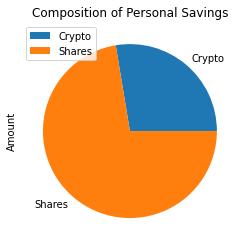

In [18]:
# Plot savings pie chart
df_savings.plot.pie(y='Amount', title='Composition of Personal Savings')

In [19]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_total + shares_total

# Validate saving health
if total_savings > emergency_fund:
    print(f'Congratulations! You have plenty of savings!')
elif total_savings == emergency_fund:
    print(f'Way to go! You have met your emergency fund goal!')
elif total_savings < emergency_fund:
    print(f'You are so close! Only ${emergency_fund - total_savings} away!')

Congratulations! You have plenty of savings!


In [20]:
# Part 2 - Retirement Planning

In [21]:
# Set the tickers
# Set timeframe to '1D' for Alpaca API
tickers = ["SPY", "AGG"]

dateframe = "1D"

# Set start and end dates of five years back from today.
start = pd.Timestamp("2015-10-14", tz="America/New_York").isoformat()
end = pd.Timestamp("2020-10-14", tz="America/New_York").isoformat()


In [22]:
# Get 5 years' worth of historical data for SPY and AGG
MC_df = alpaca.get_barset(
    tickers,
    dateframe,
    start = start,
    end = end
).df
MC_df.head()

AGG                                       \
                             open      high       low   close   volume   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.03  3785661   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.89  1792325   
2015-10-16 00:00:00-04:00  109.90  109.9400  109.7800  109.78  1497588   
2015-10-19 00:00:00-04:00  109.78  109.8950  109.6500  109.85  1289942   
2015-10-20 00:00:00-04:00  109.64  109.7800  109.5500  109.65  1672562   

                              SPY                                      
                             open    high       low   close    volume  
2015-10-14 00:00:00-04:00  200.18  200.87  198.9400  199.27  82856686  
2015-10-15 00:00:00-04:00  200.08  202.34  199.6400  202.33  96008389  
2015-10-16 00:00:00-04:00  202.83  203.29  201.9200  203.14  79323870  
2015-10-19 00:00:00-04:00  202.50  203.37  202.1300  203.33  61255929  
2015-10-20 00:00:00-04:00  202.85  203.84  202.5471  203.07  60081395

In [23]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year_portfolio = MCSimulation(
    portfolio_data = MC_df,
    weights = [.60, .40],
    num_simulation = 500,
    num_trading_days = 252 * 30)

MC_30year_portfolio.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.03  3785661   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.89  1792325   
2015-10-16 00:00:00-04:00  109.90  109.9400  109.7800  109.78  1497588   
2015-10-19 00:00:00-04:00  109.78  109.8950  109.6500  109.85  1289942   
2015-10-20 00:00:00-04:00  109.64  109.7800  109.5500  109.65  1672562   

                                           SPY                            \
                          daily_return    open    high       low   close   
2015-10-14 00:00:00-04:00          NaN  200.18  200.87  198.9400  199.27   
2015-10-15 00:00:00-04:00    -0.001272  200.08  202.34  199.6400  202.33   
2015-10-16 00:00:00-04:00    -0.001001  202.83  203.29  201.9200  203.14   
2015-10-19 00:00:00-04:00     0.000638  202.50  203.37  202.1300  203.33   
2015-10-20 00:00:00-04:00    -0.001821  202.85  203.84  202.5471  203.07   

                                                  
                             volume daily_return  
2015-10-14 00:00:00-04:00  82856686          NaN  
2015-10-15 00:00:00-04:00  96008389     0.015356  
2015-10-16 00:00:00-04:00  79323870     0.004003  
2015-10-19 00:00:00-04:00  61255929     0.000935  
2015-10-20 00:00:00-04:00  60081395    -0.001279

In [24]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1      0.994391  0.995512  0.998571  1.001112  1.005787  0.996697  0.992706   
2      1.003803  1.002943  1.003192  1.008340  1.009468  1.004783  0.997790   
3      1.008482  1.000778  1.003415  1.011983  1.007636  1.007047  1.000345   
4      1.016949  1.003289  1.013534  1.014449  1.004768  1.001619  0.995535   
...         ...       ...       ...       ...       ...       ...       ...   
7556  13.311212  7.334242  7.301442  6.468745  5.436140  2.779690  3.838377   
7557  13.195402  7.305091  7.311417  6.516752  5.441712  2.769169  3.838083   
7558  13.232613  7.324317  7.352727  6.481173  5.461948  2.758815  3.828501   
7559  13.164920  7.307312  7.372855  6.525493  5.494350  2.738244  3.857900   
7560  13.219793  7.332701  7.363531  6.548587  5.458655  2.723446  3.838843   

           7         8         9    ...        490       491        492  \
0     1.000000  1.000000  1.000000  ...   1.000000  1.000000   1.000000   
1     0.999900  0.997257  0.995061  ...   0.998699  0.997451   0.999512   
2     0.997398  0.997726  1.000358  ...   0.995755  0.999852   0.998104   
3     0.994761  1.000358  1.000706  ...   1.002345  0.997751   0.997772   
4     0.988844  0.999317  0.993325  ...   1.000431  0.999699   0.998895   
...        ...       ...       ...  ...        ...       ...        ...   
7556  6.604875  5.098515  7.470181  ...  12.115152  5.886243  11.245862   
7557  6.606384  5.105830  7.464250  ...  12.040430  5.855232  11.388230   
7558  6.647058  5.136539  7.489762  ...  12.091058  5.900917  11.412036   
7559  6.622411  5.117960  7.511902  ...  12.087943  5.923431  11.512228   
7560  6.614622  5.144424  7.539933  ...  12.095525  5.906456  11.517170   

           493       494       495       496       497        498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000   1.000000  1.000000  
1     1.001644  0.999568  1.003604  1.008167  1.002926   1.004211  1.003845  
2     1.002200  1.002610  0.997702  1.005944  1.013549   0.996269  1.002574  
3     0.993112  1.002558  1.004951  1.003477  1.009943   0.990881  0.998800  
4     0.990132  1.010342  1.008383  1.010053  1.000037   0.994300  0.995783  
...        ...       ...       ...       ...       ...        ...       ...  
7556  5.193249  3.627382  4.612990  4.117855  5.542581  11.860931  3.978205  
7557  5.187912  3.649876  4.656461  4.106897  5.602289  11.850336  3.954584  
7558  5.195481  3.591017  4.664141  4.092469  5.550565  11.844667  3.931264  
7559  5.193592  3.620697  4.664982  4.092255  5.515455  11.790169  3.925996  
7560  5.224006  3.632331  4.625377  4.103011  5.496450  11.761020  3.932799  

[7561 rows x 500 columns]

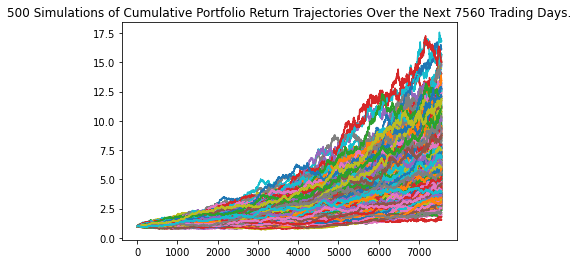

In [25]:
# Plot simulation outcomes
MC_plotline = MC_30year_portfolio.plot_simulation()
MC_plotline

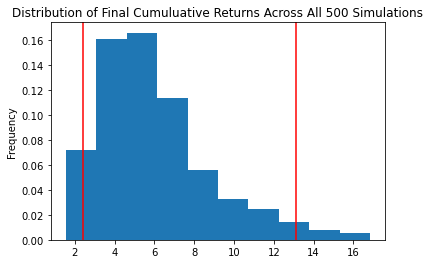

In [26]:
# Plot probability distribution and confidence intervals
MC_30year_portfolio.plot_distribution()

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_tbl = MC_30year_portfolio.summarize_cumulative_return()
print(MC_tbl)

count           500.000000
mean              6.018787
std               2.820919
min               1.542392
25%               4.045169
50%               5.462269
75%               7.317984
max              16.847393
95% CI Lower      2.405108
95% CI Upper     13.105846
Name: 7560, dtype: float64


In [28]:
# Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?
initial_investment = 20000
even_ci_lower = round(MC_tbl[8] * initial_investment, 2)
even_ci_upper = round(MC_tbl[9] * initial_investment, 2)

print(f'There is a 95% chance that an initial investment of ${initial_investment} in the portfolio'
    f' over the next 30 years will fall in the range of'
    f' ${even_ci_lower} and ${even_ci_upper}.')

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will fall in the range of $48102.16 and $262116.92.


In [29]:
# How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?
initial_investment_increased = 20000 * 1.5
even_ci_lower_2 = round(MC_tbl[8] * (initial_investment_increased * 1.5), 2)
even_ci_upper_2 = round(MC_tbl[9] * (initial_investment_increased * 1.5), 2)

print(f'There is a 95% chance that an initial investment of ${initial_investment_increased} in the portfolio'
    f' over the next 30 years will fall in the range of'
    f' ${even_ci_lower_2} and ${even_ci_upper_2}.')

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will fall in the range of $108229.86 and $589763.06.


In [30]:
# 5 Year Retirement Option
MC_5year_portfolio = MCSimulation(
    portfolio_data = MC_df,
    weights = [.70, .30],
    num_simulation = 500,
    num_trading_days = 252 * 5)

MC_5year_portfolio.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.03  3785661   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.89  1792325   
2015-10-16 00:00:00-04:00  109.90  109.9400  109.7800  109.78  1497588   
2015-10-19 00:00:00-04:00  109.78  109.8950  109.6500  109.85  1289942   
2015-10-20 00:00:00-04:00  109.64  109.7800  109.5500  109.65  1672562   

                                           SPY                            \
                          daily_return    open    high       low   close   
2015-10-14 00:00:00-04:00          NaN  200.18  200.87  198.9400  199.27   
2015-10-15 00:00:00-04:00    -0.001272  200.08  202.34  199.6400  202.33   
2015-10-16 00:00:00-04:00    -0.001001  202.83  203.29  201.9200  203.14   
2015-10-19 00:00:00-04:00     0.000638  202.50  203.37  202.1300  203.33   
2015-10-20 00:00:00-04:00    -0.001821  202.85  203.84  202.5471  203.07   

                                                  
                             volume daily_return  
2015-10-14 00:00:00-04:00  82856686          NaN  
2015-10-15 00:00:00-04:00  96008389     0.015356  
2015-10-16 00:00:00-04:00  79323870     0.004003  
2015-10-19 00:00:00-04:00  61255929     0.000935  
2015-10-20 00:00:00-04:00  60081395    -0.001279

In [31]:
MC_5year_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.996522  1.001097  0.998402  1.002843  1.003453  1.002741  0.997083   
2     0.988384  0.999127  0.998395  1.004309  1.009976  1.011713  0.991574   
3     0.988563  1.002994  0.996264  1.006731  1.013515  1.017499  0.995700   
4     0.992842  1.004282  1.001701  1.001665  1.007605  1.014798  0.995666   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.132025  1.115848  1.268214  1.578978  1.143753  1.093248  1.204557   
1257  1.140056  1.110599  1.273422  1.586239  1.147053  1.094934  1.202472   
1258  1.139451  1.111311  1.278965  1.592528  1.140178  1.101605  1.198152   
1259  1.140420  1.115955  1.282591  1.602427  1.142326  1.103561  1.204904   
1260  1.141235  1.121553  1.289335  1.605942  1.141892  1.105186  1.206248   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.998938  1.001684  0.999200  ...  0.999511  0.996443  1.001880   
2     0.996545  0.996498  1.002199  ...  0.994853  0.991116  1.003223   
3     0.996614  0.996513  1.001858  ...  0.990163  0.992841  1.005443   
4     0.993796  0.997982  1.003266  ...  0.991524  0.989863  1.007230   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.399047  1.268589  1.129268  ...  1.637706  1.194872  1.326728   
1257  1.399963  1.265993  1.132464  ...  1.640065  1.197999  1.329779   
1258  1.406493  1.268436  1.140537  ...  1.649847  1.200010  1.329706   
1259  1.407061  1.271994  1.139819  ...  1.651916  1.205984  1.328099   
1260  1.402121  1.269779  1.142295  ...  1.657817  1.204053  1.321764   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.997820  0.999183  1.003018  0.995714  0.996067  1.009317  1.001783  
2     0.986720  0.998114  1.002231  0.997662  0.989239  1.011224  1.001807  
3     0.981129  0.990409  1.001936  1.002681  0.989488  1.018567  1.007791  
4     0.980337  0.983902  1.004212  1.001099  0.992406  1.022892  1.008627  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.319716  1.335879  1.500417  1.571230  0.975361  1.216377  1.198661  
1257  1.318976  1.338996  1.501420  1.587494  0.972052  1.224609  1.205014  
1258  1.303291  1.342194  1.504402  1.590892  0.966447  1.223918  1.202610  
1259  1.299129  1.341619  1.502122  1.589366  0.967962  1.225821  1.211476  
1260  1.315274  1.349029  1.499471  1.594204  0.971312  1.235367  1.207096  

[1261 rows x 500 columns]

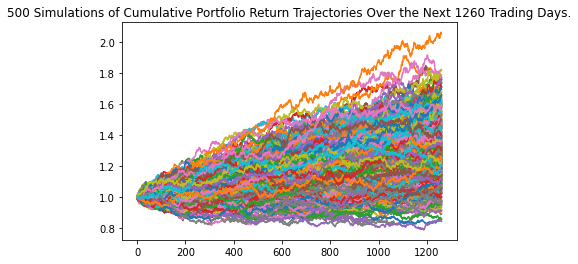

In [32]:
MC_5year_plotline = MC_5year_portfolio.plot_simulation()
MC_5year_plotline

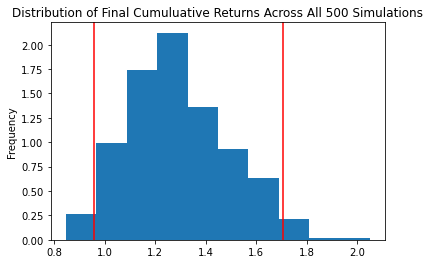

In [33]:
MC_5year_portfolio.plot_distribution()

In [34]:
MC_5year_tbl = MC_5year_portfolio.summarize_cumulative_return()
print(MC_5year_tbl)

count           500.000000
mean              1.289185
std               0.195481
min               0.845215
25%               1.145423
50%               1.271358
75%               1.415956
max               2.051290
95% CI Lower      0.955497
95% CI Upper      1.707601
Name: 1260, dtype: float64


In [47]:
initial_5year_investment = 60000
even_ci_lower_5year = round(MC_5year_tbl[8] * initial_5year_investment, 2)

even_ci_upper_5year = round(MC_5year_tbl[9] * initial_5year_investment, 2)

print(f'There is a 95% chance that an initial investment of ${initial_5year_investment} in the portfolio'
    f' over the next 5 years will fall in the range of'
    f' ${even_ci_lower_5year} and ${even_ci_upper_5year}.')

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will fall in the range of $57329.83 and $102456.08.


In [48]:
# 10 Year Retirement Option
MC_10year_portfolio = MCSimulation(
    portfolio_data = MC_df,
    weights = [.70, .30],
    num_simulation = 500,
    num_trading_days = 252 * 10)

MC_10year_portfolio.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.03  3785661   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.89  1792325   
2015-10-16 00:00:00-04:00  109.90  109.9400  109.7800  109.78  1497588   
2015-10-19 00:00:00-04:00  109.78  109.8950  109.6500  109.85  1289942   
2015-10-20 00:00:00-04:00  109.64  109.7800  109.5500  109.65  1672562   

                                           SPY                            \
                          daily_return    open    high       low   close   
2015-10-14 00:00:00-04:00          NaN  200.18  200.87  198.9400  199.27   
2015-10-15 00:00:00-04:00    -0.001272  200.08  202.34  199.6400  202.33   
2015-10-16 00:00:00-04:00    -0.001001  202.83  203.29  201.9200  203.14   
2015-10-19 00:00:00-04:00     0.000638  202.50  203.37  202.1300  203.33   
2015-10-20 00:00:00-04:00    -0.001821  202.85  203.84  202.5471  203.07   

                                                  
                             volume daily_return  
2015-10-14 00:00:00-04:00  82856686          NaN  
2015-10-15 00:00:00-04:00  96008389     0.015356  
2015-10-16 00:00:00-04:00  79323870     0.004003  
2015-10-19 00:00:00-04:00  61255929     0.000935  
2015-10-20 00:00:00-04:00  60081395    -0.001279

In [49]:
MC_10year_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.993836  1.008310  1.004914  1.001706  1.000740  0.996824  1.002470   
2     0.989539  1.005012  1.005537  1.003737  0.996372  0.987371  0.999667   
3     0.988220  1.012486  1.005663  1.013890  1.002506  0.988415  0.992117   
4     0.990942  1.006207  1.004805  1.016629  0.998992  0.988875  0.986984   
...        ...       ...       ...       ...       ...       ...       ...   
2516  2.658807  1.644268  1.484421  1.315629  1.564122  1.165625  1.714312   
2517  2.646549  1.645152  1.485128  1.310724  1.565319  1.164044  1.711020   
2518  2.631627  1.636741  1.485516  1.307628  1.569504  1.162811  1.719226   
2519  2.641131  1.638238  1.495184  1.305148  1.564472  1.169492  1.707030   
2520  2.628647  1.630303  1.506051  1.300643  1.565072  1.173572  1.706462   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.008148  1.003675  0.996438  ...  0.999063  0.991400  1.000255   
2     1.007799  1.005958  0.996379  ...  1.001471  0.996983  0.997608   
3     1.014446  1.001675  0.999048  ...  1.002366  0.993971  1.000788   
4     1.018995  0.998011  0.999323  ...  1.006993  0.994588  1.002717   
...        ...       ...       ...  ...       ...       ...       ...   
2516  1.693594  1.662597  1.474939  ...  1.516909  1.845406  1.541741   
2517  1.700923  1.659289  1.469195  ...  1.509445  1.850859  1.549957   
2518  1.706126  1.653187  1.464300  ...  1.519506  1.848852  1.549793   
2519  1.707556  1.669306  1.468056  ...  1.534006  1.856974  1.554748   
2520  1.702616  1.661670  1.467667  ...  1.535063  1.850166  1.553396   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.998272  1.002598  1.004682  0.997636  1.000109  1.001257  1.008657  
2     1.001410  1.011329  1.005996  1.000857  1.001967  1.001847  1.003974  
3     1.005501  1.006966  1.009503  1.002819  0.996014  1.002881  1.006306  
4     1.007113  1.004983  1.011859  1.009145  0.993066  1.005509  1.005810  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.442009  1.975606  1.581167  1.392738  1.807459  2.193622  2.467570  
2517  1.437880  1.982272  1.578435  1.392226  1.811883  2.187402  2.470651  
2518  1.447703  1.986068  1.584471  1.387980  1.809486  2.204772  2.479693  
2519  1.455420  1.990611  1.579551  1.380787  1.813266  2.189533  2.465793  
2520  1.464763  1.982738  1.569241  1.383396  1.828041  2.193747  2.474608  

[2521 rows x 500 columns]

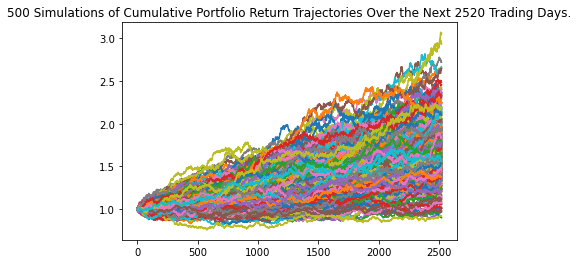

In [38]:
MC_10year_plotline = MC_10year_portfolio.plot_simulation()
MC_10year_plotline

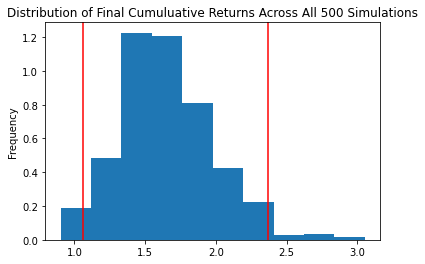

In [39]:
MC_10year_portfolio.plot_distribution()

In [40]:
MC_10year_tbl = MC_10year_portfolio.summarize_cumulative_return()
print(MC_10year_tbl)

count           500.000000
mean              1.654527
std               0.337264
min               0.901226
25%               1.423986
50%               1.613482
75%               1.866710
max               3.054378
95% CI Lower      1.061181
95% CI Upper      2.366234
Name: 2520, dtype: float64


In [41]:
initial_10year_investment = 90000
even_ci_lower_10year = round(MC_10year_tbl[8] * initial_10year_investment, 2)

even_ci_upper_10year = round(MC_10year_tbl[9] * initial_10year_investment, 2)

print(f'There is a 95% chance that an initial investment of ${initial_10year_investment} in the portfolio'
    f' over the next 5 years will fall in the range of'
    f' ${even_ci_lower_10year} and ${even_ci_upper_10year}.')

There is a 95% chance that an initial investment of $90000 in the portfolio over the next 5 years will fall in the range of $95506.25 and $212961.03.
